# SR-Adam Quick Launcher

This notebook is a minimal launcher for running SR-Adam experiments. For detailed documentation, see README.md and QUICK_START.md.

**Quick Reference:**
- Run examples below or modify parameters as needed
- Use `--dataset ALL` to test on both CIFAR10 and CIFAR100
- Use `--noise ALL` to test all noise levels [0.0, 0.05, 0.1]
- Use `--optimizers ALL` to compare all optimization methods
- Results are saved to `results/` and checkpoints to `runs/`

In [ ]:
import os
if 'google.colab' in str(get_ipython()):
    if not os.path.exists('/content/SR-Adam'):
        !git clone https://github.com/mamintoosi-papers-codes/SR-Adam.git
    %cd /content/SR-Adam
    !pip install -r requirements-cpu.txt

In [ ]:
# Example: Single dataset, specific noise level, and optimizers
# Runs Adam and SR-Adam on CIFAR10 with noise=0.1 for 5 runs
%run main.py \
  --dataset CIFAR10 \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise 0.1 \
  --optimizers "adam|sradam" \
  --clean_previous

In [ ]:
# Full experimental sweep: all datasets, all noise levels, all optimizers
# Runs: 2 datasets × 3 noise levels × 4 optimizers × 5 runs = 120 runs total
# This takes approximately 30+ hours on GPU
%run main.py \
  --dataset ALL \
  --model simplecnn \
  --batch_size 512 \
  --num_epochs 20 \
  --num_runs 5 \
  --noise ALL \
  --optimizers ALL \
  --clean_previous

In [ ]:
# Generate qualitative comparison figures (prediction visualizations)
# Shows sample predictions from best runs for visual comparison
# Adjust seeds to explore different sample sets
%run tools/generate_qualitative_comparison.py --dataset CIFAR10  --noise 0.05 --seed 1000
%run tools/generate_qualitative_comparison.py --dataset CIFAR100 --noise 0.05 --seed 2026

Using device: cuda
GPU: NVIDIA GeForce RTX 3090
Noise levels to test: [0.05]
Batch sizes to test: [64, 128, 256, 1024]

=== Dataset: CIFAR10 | Noise: 0.05 | Batch: 64 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: Adam

Run 1/3 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 782/782 [00:34<00:00, 22.96it/s]
D:\git\mamintoosi-papers-codes\SR-Adam\src\training.py:83: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1/20 | Train Loss: 1.5984 | Train Acc: 41.46% | Test Loss: 1.2601 | Test Acc: 55.20% | Time: 37.89s


Epoch 10/20: 100%|██████████| 782/782 [00:34<00:00, 22.73it/s]


Epoch 10/20 | Train Loss: 0.9083 | Train Acc: 68.00% | Test Loss: 0.7805 | Test Acc: 72.77% | Time: 37.52s


Epoch 20/20: 100%|██████████| 782/782 [00:34<00:00, 22.86it/s]


Epoch 20/20 | Train Loss: 0.8113 | Train Acc: 71.71% | Test Loss: 0.6983 | Test Acc: 75.78% | Time: 37.29s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_64\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_64\run_1_last.pt

Run 2/3 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 782/782 [00:34<00:00, 22.69it/s]


Epoch 1/20 | Train Loss: 1.6034 | Train Acc: 41.22% | Test Loss: 1.2291 | Test Acc: 55.91% | Time: 37.57s


Epoch 10/20: 100%|██████████| 782/782 [00:34<00:00, 22.52it/s]


Epoch 10/20 | Train Loss: 0.9207 | Train Acc: 67.96% | Test Loss: 0.8154 | Test Acc: 71.18% | Time: 37.84s


Epoch 20/20: 100%|██████████| 782/782 [00:36<00:00, 21.14it/s]


Epoch 20/20 | Train Loss: 0.8080 | Train Acc: 71.78% | Test Loss: 0.7163 | Test Acc: 75.14% | Time: 40.36s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_64\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_64\run_2_last.pt

Run 3/3 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 782/782 [00:37<00:00, 20.78it/s]


Epoch 1/20 | Train Loss: 1.5758 | Train Acc: 42.73% | Test Loss: 1.2321 | Test Acc: 55.71% | Time: 40.81s


Epoch 10/20: 100%|██████████| 782/782 [00:30<00:00, 25.83it/s]


Epoch 10/20 | Train Loss: 0.8533 | Train Acc: 69.98% | Test Loss: 0.7492 | Test Acc: 74.05% | Time: 33.03s


Epoch 20/20: 100%|██████████| 782/782 [00:30<00:00, 25.68it/s]


Epoch 20/20 | Train Loss: 0.7392 | Train Acc: 74.05% | Test Loss: 0.6678 | Test Acc: 77.07% | Time: 33.24s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_64\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_64\run_3_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam

Run 1/3 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 782/782 [00:31<00:00, 24.79it/s]


Epoch 1/20 | Train Loss: 1.6250 | Train Acc: 40.55% | Test Loss: 1.3869 | Test Acc: 50.11% | Time: 34.34s


Epoch 10/20: 100%|██████████| 782/782 [00:31<00:00, 24.87it/s]


Epoch 10/20 | Train Loss: 1.0276 | Train Acc: 63.64% | Test Loss: 0.8888 | Test Acc: 69.14% | Time: 34.24s


Epoch 20/20: 100%|██████████| 782/782 [00:31<00:00, 24.83it/s]


Epoch 20/20 | Train Loss: 0.9582 | Train Acc: 66.61% | Test Loss: 0.8376 | Test Acc: 71.66% | Time: 34.29s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_64\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_64\run_1_last.pt

Run 2/3 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 782/782 [00:31<00:00, 24.82it/s]


Epoch 1/20 | Train Loss: 1.6345 | Train Acc: 39.73% | Test Loss: 1.2871 | Test Acc: 53.15% | Time: 34.28s


Epoch 10/20: 100%|██████████| 782/782 [00:31<00:00, 24.77it/s]


Epoch 10/20 | Train Loss: 1.0266 | Train Acc: 64.25% | Test Loss: 0.8951 | Test Acc: 68.36% | Time: 34.38s


Epoch 20/20: 100%|██████████| 782/782 [00:31<00:00, 24.79it/s]


Epoch 20/20 | Train Loss: 0.9500 | Train Acc: 66.87% | Test Loss: 0.8552 | Test Acc: 70.23% | Time: 34.32s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_64\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_64\run_2_last.pt

Run 3/3 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 782/782 [00:31<00:00, 24.85it/s]


Epoch 1/20 | Train Loss: 1.5984 | Train Acc: 41.65% | Test Loss: 1.2267 | Test Acc: 56.27% | Time: 34.29s


Epoch 10/20: 100%|██████████| 782/782 [00:31<00:00, 24.86it/s]


Epoch 10/20 | Train Loss: 0.9719 | Train Acc: 65.79% | Test Loss: 0.8545 | Test Acc: 70.06% | Time: 34.28s


Epoch 20/20: 100%|██████████| 782/782 [00:31<00:00, 24.78it/s]


Epoch 20/20 | Train Loss: 0.9252 | Train Acc: 67.68% | Test Loss: 0.8050 | Test Acc: 72.12% | Time: 34.34s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_64\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_64\run_3_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results


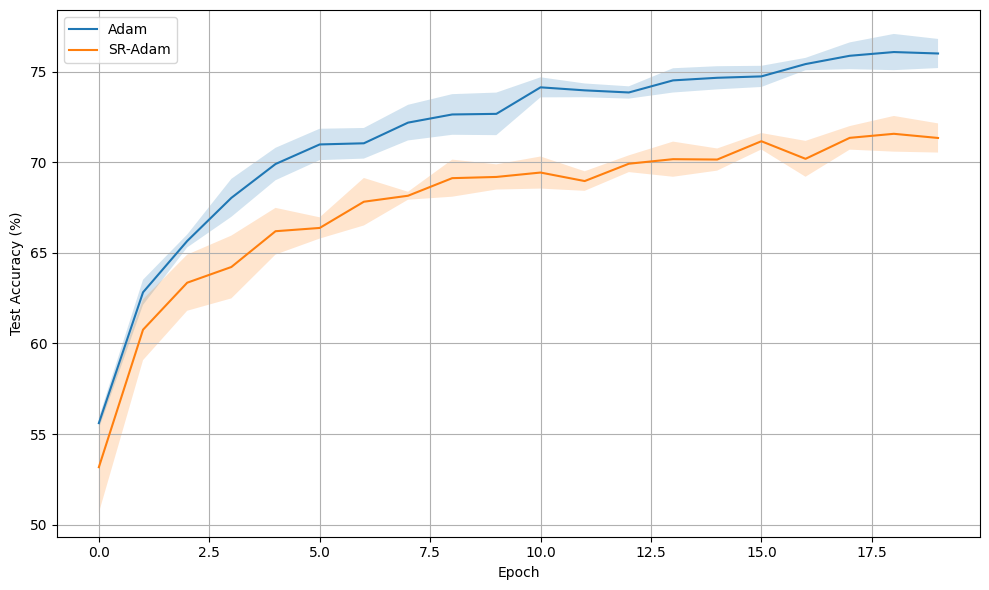

Saved epoch mean/std plot to results\CIFAR10\simplecnn\noise_0.05

=== Dataset: CIFAR10 | Noise: 0.05 | Batch: 128 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: Adam

Run 1/3 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 391/391 [00:28<00:00, 13.57it/s]


Epoch 1/20 | Train Loss: 1.6469 | Train Acc: 39.71% | Test Loss: 1.3043 | Test Acc: 53.11% | Time: 31.65s


Epoch 10/20: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]


Epoch 10/20 | Train Loss: 0.9066 | Train Acc: 68.12% | Test Loss: 0.7818 | Test Acc: 72.76% | Time: 31.59s


Epoch 20/20: 100%|██████████| 391/391 [00:30<00:00, 12.94it/s]


Epoch 20/20 | Train Loss: 0.7949 | Train Acc: 71.92% | Test Loss: 0.6850 | Test Acc: 75.78% | Time: 33.04s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_128\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_128\run_1_last.pt

Run 2/3 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 391/391 [00:28<00:00, 13.63it/s]


Epoch 1/20 | Train Loss: 1.6155 | Train Acc: 41.29% | Test Loss: 1.2310 | Test Acc: 55.35% | Time: 31.54s


Epoch 10/20: 100%|██████████| 391/391 [00:28<00:00, 13.62it/s]


Epoch 10/20 | Train Loss: 0.8981 | Train Acc: 68.45% | Test Loss: 0.7789 | Test Acc: 72.50% | Time: 31.54s


Epoch 20/20: 100%|██████████| 391/391 [00:28<00:00, 13.63it/s]


Epoch 20/20 | Train Loss: 0.7693 | Train Acc: 73.12% | Test Loss: 0.6875 | Test Acc: 76.33% | Time: 31.51s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_128\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_128\run_2_last.pt

Run 3/3 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 391/391 [00:28<00:00, 13.60it/s]


Epoch 1/20 | Train Loss: 1.6156 | Train Acc: 41.02% | Test Loss: 1.2701 | Test Acc: 54.43% | Time: 31.55s


Epoch 10/20: 100%|██████████| 391/391 [00:28<00:00, 13.63it/s]


Epoch 10/20 | Train Loss: 0.8741 | Train Acc: 69.19% | Test Loss: 0.7456 | Test Acc: 73.77% | Time: 31.49s


Epoch 20/20: 100%|██████████| 391/391 [00:28<00:00, 13.64it/s]


Epoch 20/20 | Train Loss: 0.7505 | Train Acc: 73.51% | Test Loss: 0.6549 | Test Acc: 76.78% | Time: 31.51s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_128\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_128\run_3_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam

Run 1/3 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 391/391 [00:29<00:00, 13.32it/s]


Epoch 1/20 | Train Loss: 1.6979 | Train Acc: 37.85% | Test Loss: 1.3183 | Test Acc: 51.87% | Time: 32.15s


Epoch 10/20: 100%|██████████| 391/391 [00:29<00:00, 13.33it/s]


Epoch 10/20 | Train Loss: 1.0002 | Train Acc: 64.71% | Test Loss: 0.8840 | Test Acc: 69.35% | Time: 32.17s


Epoch 20/20: 100%|██████████| 391/391 [00:29<00:00, 13.33it/s]


Epoch 20/20 | Train Loss: 0.9377 | Train Acc: 67.03% | Test Loss: 0.8114 | Test Acc: 71.62% | Time: 32.16s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_128\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_128\run_1_last.pt

Run 2/3 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s]


Epoch 1/20 | Train Loss: 1.6187 | Train Acc: 41.00% | Test Loss: 1.2351 | Test Acc: 56.00% | Time: 32.24s


Epoch 10/20: 100%|██████████| 391/391 [00:29<00:00, 13.39it/s]


Epoch 10/20 | Train Loss: 0.9299 | Train Acc: 67.62% | Test Loss: 0.7983 | Test Acc: 72.46% | Time: 32.06s


Epoch 20/20: 100%|██████████| 391/391 [00:29<00:00, 13.37it/s]


Epoch 20/20 | Train Loss: 0.8430 | Train Acc: 70.57% | Test Loss: 0.7404 | Test Acc: 74.48% | Time: 32.08s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_128\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_128\run_2_last.pt

Run 3/3 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 391/391 [00:29<00:00, 13.31it/s]


Epoch 1/20 | Train Loss: 1.6204 | Train Acc: 41.03% | Test Loss: 1.2218 | Test Acc: 56.56% | Time: 32.22s


Epoch 10/20: 100%|██████████| 391/391 [00:29<00:00, 13.29it/s]


Epoch 10/20 | Train Loss: 0.8852 | Train Acc: 68.77% | Test Loss: 0.8036 | Test Acc: 72.75% | Time: 32.24s


Epoch 20/20: 100%|██████████| 391/391 [00:29<00:00, 13.33it/s]


Epoch 20/20 | Train Loss: 0.8013 | Train Acc: 72.03% | Test Loss: 0.7216 | Test Acc: 74.91% | Time: 32.14s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_128\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_128\run_3_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results


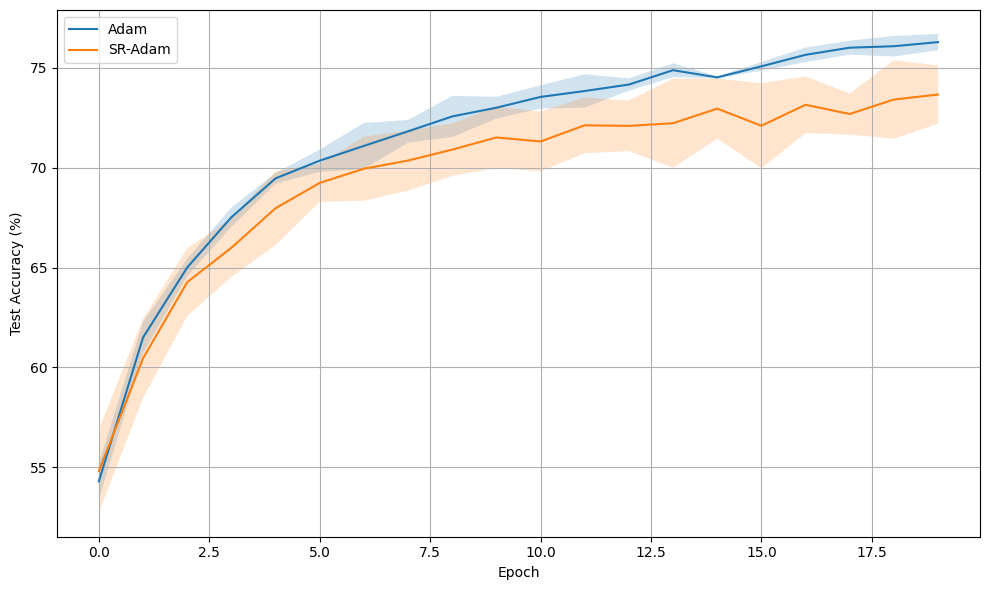

Saved epoch mean/std plot to results\CIFAR10\simplecnn\noise_0.05

=== Dataset: CIFAR10 | Noise: 0.05 | Batch: 256 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: Adam

Run 1/3 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 196/196 [00:27<00:00,  7.07it/s]


Epoch 1/20 | Train Loss: 1.6931 | Train Acc: 38.15% | Test Loss: 1.3394 | Test Acc: 52.17% | Time: 30.48s


Epoch 10/20: 100%|██████████| 196/196 [00:27<00:00,  7.05it/s]


Epoch 10/20 | Train Loss: 0.9355 | Train Acc: 66.91% | Test Loss: 0.7808 | Test Acc: 72.36% | Time: 30.58s


Epoch 20/20: 100%|██████████| 196/196 [00:27<00:00,  7.05it/s]


Epoch 20/20 | Train Loss: 0.8070 | Train Acc: 71.64% | Test Loss: 0.6978 | Test Acc: 75.20% | Time: 30.60s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_256\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_256\run_1_last.pt

Run 2/3 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 196/196 [00:27<00:00,  7.05it/s]


Epoch 1/20 | Train Loss: 1.6958 | Train Acc: 37.97% | Test Loss: 1.3312 | Test Acc: 51.39% | Time: 30.57s


Epoch 10/20: 100%|██████████| 196/196 [00:27<00:00,  7.02it/s]


Epoch 10/20 | Train Loss: 0.9420 | Train Acc: 66.92% | Test Loss: 0.8336 | Test Acc: 70.53% | Time: 30.70s


Epoch 20/20: 100%|██████████| 196/196 [00:27<00:00,  7.06it/s]


Epoch 20/20 | Train Loss: 0.8150 | Train Acc: 71.34% | Test Loss: 0.7220 | Test Acc: 74.87% | Time: 30.57s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_256\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_256\run_2_last.pt

Run 3/3 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 196/196 [00:28<00:00,  6.99it/s]


Epoch 1/20 | Train Loss: 1.6864 | Train Acc: 38.36% | Test Loss: 1.3701 | Test Acc: 50.50% | Time: 30.83s


Epoch 10/20: 100%|██████████| 196/196 [00:27<00:00,  7.01it/s]


Epoch 10/20 | Train Loss: 0.9067 | Train Acc: 67.89% | Test Loss: 0.7896 | Test Acc: 72.43% | Time: 30.75s


Epoch 20/20: 100%|██████████| 196/196 [00:27<00:00,  7.05it/s]


Epoch 20/20 | Train Loss: 0.7722 | Train Acc: 72.94% | Test Loss: 0.6760 | Test Acc: 76.13% | Time: 30.55s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_256\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_256\run_3_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam

Run 1/3 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 196/196 [00:28<00:00,  6.90it/s]


Epoch 1/20 | Train Loss: 1.7210 | Train Acc: 37.26% | Test Loss: 1.3372 | Test Acc: 51.54% | Time: 31.19s


Epoch 10/20: 100%|██████████| 196/196 [00:28<00:00,  6.97it/s]


Epoch 10/20 | Train Loss: 0.9192 | Train Acc: 67.64% | Test Loss: 0.7967 | Test Acc: 71.85% | Time: 30.94s


Epoch 20/20: 100%|██████████| 196/196 [00:28<00:00,  6.94it/s]


Epoch 20/20 | Train Loss: 0.8041 | Train Acc: 71.79% | Test Loss: 0.7123 | Test Acc: 74.92% | Time: 31.04s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_256\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_256\run_1_last.pt

Run 2/3 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 196/196 [00:28<00:00,  6.97it/s]


Epoch 1/20 | Train Loss: 1.7187 | Train Acc: 37.09% | Test Loss: 1.3308 | Test Acc: 52.00% | Time: 30.91s


Epoch 10/20: 100%|██████████| 196/196 [00:28<00:00,  6.98it/s]


Epoch 10/20 | Train Loss: 0.8730 | Train Acc: 69.45% | Test Loss: 0.7966 | Test Acc: 72.23% | Time: 30.84s


Epoch 20/20: 100%|██████████| 196/196 [00:28<00:00,  6.97it/s]


Epoch 20/20 | Train Loss: 0.7756 | Train Acc: 72.87% | Test Loss: 0.7079 | Test Acc: 76.02% | Time: 30.90s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_256\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_256\run_2_last.pt

Run 3/3 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 196/196 [00:28<00:00,  6.95it/s]


Epoch 1/20 | Train Loss: 1.7239 | Train Acc: 36.90% | Test Loss: 1.3646 | Test Acc: 50.47% | Time: 30.97s


Epoch 10/20: 100%|██████████| 196/196 [00:28<00:00,  6.97it/s]


Epoch 10/20 | Train Loss: 0.9039 | Train Acc: 68.10% | Test Loss: 0.7749 | Test Acc: 73.45% | Time: 30.89s


Epoch 20/20: 100%|██████████| 196/196 [00:28<00:00,  6.96it/s]


Epoch 20/20 | Train Loss: 0.8113 | Train Acc: 71.63% | Test Loss: 0.7139 | Test Acc: 75.20% | Time: 30.92s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_256\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_256\run_3_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results


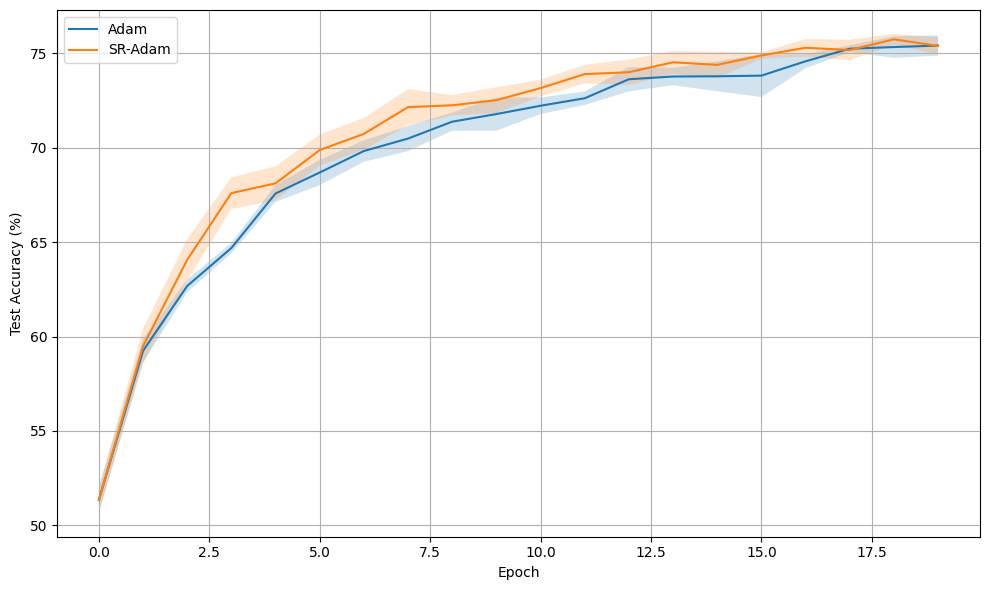

Saved epoch mean/std plot to results\CIFAR10\simplecnn\noise_0.05

=== Dataset: CIFAR10 | Noise: 0.05 | Batch: 1024 ===
Using model: simplecnn
Files already downloaded and verified
Files already downloaded and verified

Optimizer: Adam

Run 1/3 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 49/49 [00:25<00:00,  1.91it/s]


Epoch 1/20 | Train Loss: 1.9024 | Train Acc: 30.69% | Test Loss: 1.5350 | Test Acc: 45.30% | Time: 28.34s


Epoch 10/20: 100%|██████████| 49/49 [00:29<00:00,  1.65it/s]


Epoch 10/20 | Train Loss: 1.0730 | Train Acc: 62.04% | Test Loss: 0.9379 | Test Acc: 67.89% | Time: 32.80s


Epoch 20/20: 100%|██████████| 49/49 [00:29<00:00,  1.65it/s]


Epoch 20/20 | Train Loss: 0.9115 | Train Acc: 67.90% | Test Loss: 0.7803 | Test Acc: 73.18% | Time: 32.74s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_1024\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_1024\run_1_last.pt

Run 2/3 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]


Epoch 1/20 | Train Loss: 1.8963 | Train Acc: 30.79% | Test Loss: 1.6307 | Test Acc: 41.30% | Time: 32.19s


Epoch 10/20: 100%|██████████| 49/49 [00:28<00:00,  1.74it/s]


Epoch 10/20 | Train Loss: 1.0913 | Train Acc: 61.31% | Test Loss: 0.9589 | Test Acc: 66.52% | Time: 31.11s


Epoch 20/20: 100%|██████████| 49/49 [00:27<00:00,  1.77it/s]


Epoch 20/20 | Train Loss: 0.9287 | Train Acc: 67.31% | Test Loss: 0.8373 | Test Acc: 70.92% | Time: 30.46s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_1024\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_1024\run_2_last.pt

Run 3/3 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 49/49 [00:27<00:00,  1.81it/s]


Epoch 1/20 | Train Loss: 1.9473 | Train Acc: 28.98% | Test Loss: 1.5893 | Test Acc: 43.66% | Time: 29.86s


Epoch 10/20: 100%|██████████| 49/49 [00:27<00:00,  1.76it/s]


Epoch 10/20 | Train Loss: 1.1388 | Train Acc: 59.74% | Test Loss: 1.0065 | Test Acc: 64.72% | Time: 30.70s


Epoch 20/20: 100%|██████████| 49/49 [00:27<00:00,  1.80it/s]


Epoch 20/20 | Train Loss: 0.9538 | Train Acc: 66.41% | Test Loss: 0.8281 | Test Acc: 70.79% | Time: 30.19s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_1024\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_1024\run_3_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\Adam\batch_size_512\runs_and_aggregate.xlsx

Optimizer: SR-Adam

Run 1/3 | seed = 42
Model params: 545,098


Epoch 1/20: 100%|██████████| 49/49 [00:27<00:00,  1.75it/s]


Epoch 1/20 | Train Loss: 1.9467 | Train Acc: 28.88% | Test Loss: 1.5847 | Test Acc: 43.11% | Time: 30.76s


Epoch 10/20: 100%|██████████| 49/49 [00:27<00:00,  1.75it/s]


Epoch 10/20 | Train Loss: 1.0036 | Train Acc: 64.37% | Test Loss: 0.8583 | Test Acc: 69.92% | Time: 30.90s


Epoch 20/20: 100%|██████████| 49/49 [00:29<00:00,  1.68it/s]


Epoch 20/20 | Train Loss: 0.8350 | Train Acc: 70.72% | Test Loss: 0.7279 | Test Acc: 75.09% | Time: 31.92s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_1024\run_1_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_1024\run_1_last.pt

Run 2/3 | seed = 43
Model params: 545,098


Epoch 1/20: 100%|██████████| 49/49 [00:27<00:00,  1.80it/s]


Epoch 1/20 | Train Loss: 1.9337 | Train Acc: 29.49% | Test Loss: 1.6365 | Test Acc: 41.27% | Time: 30.20s


Epoch 10/20: 100%|██████████| 49/49 [00:27<00:00,  1.76it/s]


Epoch 10/20 | Train Loss: 0.9885 | Train Acc: 64.88% | Test Loss: 0.8709 | Test Acc: 69.30% | Time: 30.81s


Epoch 20/20: 100%|██████████| 49/49 [00:28<00:00,  1.74it/s]


Epoch 20/20 | Train Loss: 0.8168 | Train Acc: 71.36% | Test Loss: 0.7285 | Test Acc: 74.61% | Time: 31.01s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_1024\run_2_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_1024\run_2_last.pt

Run 3/3 | seed = 44
Model params: 545,098


Epoch 1/20: 100%|██████████| 49/49 [00:27<00:00,  1.80it/s]


Epoch 1/20 | Train Loss: 2.0053 | Train Acc: 26.76% | Test Loss: 1.6682 | Test Acc: 40.50% | Time: 30.04s


Epoch 10/20: 100%|██████████| 49/49 [00:27<00:00,  1.78it/s]


Epoch 10/20 | Train Loss: 1.0715 | Train Acc: 61.74% | Test Loss: 0.9333 | Test Acc: 67.21% | Time: 30.37s


Epoch 20/20: 100%|██████████| 49/49 [00:27<00:00,  1.78it/s]


Epoch 20/20 | Train Loss: 0.8921 | Train Acc: 68.21% | Test Loss: 0.7858 | Test Acc: 71.97% | Time: 30.64s
Saved best checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_1024\run_3_best.pt
Saved last checkpoint to runs\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_1024\run_3_last.pt
Aggregated results saved: results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\aggregated_summary.json, results\CIFAR10\simplecnn\noise_0.05\SR-Adam\batch_size_512\runs_and_aggregate.xlsx
Updated Adam aggregates with statistical test results
Updated SR-Adam aggregates with statistical test results


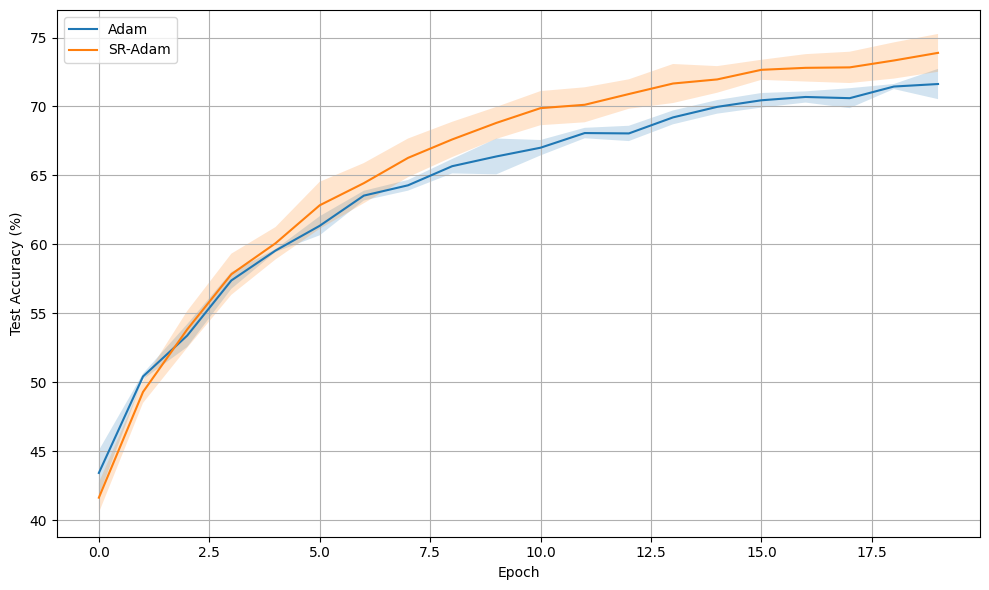

Saved epoch mean/std plot to results\CIFAR10\simplecnn\noise_0.05
Multi-run summary saved to results\summary_statistics.csv

FINAL GRID SUMMARY
CIFAR10|noise_0.05|Adam|bs_64: 76.00 ± 0.80 (best: 76.17 ± 0.94)
CIFAR10|noise_0.05|SR-Adam|bs_64: 71.34 ± 0.80 (best: 72.02 ± 0.66)
CIFAR10|noise_0.05|Adam|bs_128: 76.30 ± 0.41 (best: 76.31 ± 0.42)
CIFAR10|noise_0.05|SR-Adam|bs_128: 73.67 ± 1.46 (best: 73.75 ± 1.53)
CIFAR10|noise_0.05|Adam|bs_256: 75.40 ± 0.53 (best: 75.52 ± 0.45)
CIFAR10|noise_0.05|SR-Adam|bs_256: 75.38 ± 0.47 (best: 75.73 ± 0.28)
CIFAR10|noise_0.05|Adam|bs_1024: 71.63 ± 1.10 (best: 71.96 ± 0.87)
CIFAR10|noise_0.05|SR-Adam|bs_1024: 73.89 ± 1.37 (best: 73.89 ± 1.37)


In [2]:
# 1. Run experiments with multiple batch sizes
%run main.py \
  --dataset CIFAR10 \
  --noise 0.05 \
  --batch_size "64|128|256|1024" \
  --optimizers "adam|sradam" \
  --num_runs 3

In [ ]:
# 2. Aggregate and generate tables
%run tools/regenerate_aggregates.py --batch_size "256|512|2048"
%run tools/make_minimal_tables.py --batch_size "256|512|2048" --output paper_figures/ablation.tex

## Advanced: Filtering Results

After running experiments, you can selectively process results with filters:

### Aggregate Specific Results

In [ ]:
# Only batch_size=512
%run tools/regenerate_aggregates.py --batch_size 512

In [ ]:
# Only CIFAR10, noise=0.05
%run tools/regenerate_aggregates.py --dataset CIFAR10 --noise 0.05


In [ ]:
# Standard table (batch_size=512)
%run tools/make_minimal_tables.py --batch_size 512

# Ablation table
%run tools/make_minimal_tables.py --batch_size "256|512|2048" --output paper_figures/ablation-bs.tex

# Compare only Adam vs SR-Adam
%run tools/make_minimal_tables.py --optimizers "Adam|SR-Adam" --batch_size 512